# Optimising Retail Bank Strategies using RFM analysis customer based segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

/Users/usmanali/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/usmanali/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# This scripts reads the dataset
df = pd.read_csv('../bank_data_C (1).csv')
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1041610,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1041611,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1041612,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


## Data Cleaning

In [3]:
df.info() # checks information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


In [4]:
#This script changes the column data types
# Ensure all values in TransactionTime are 6 digits by padding with leading zeros
df['TransactionTime'] = df['TransactionTime'].astype(str).str.zfill(6)
# Convert TransactionTime to proper time format
df['TransactionTime'] = pd.to_datetime(df['TransactionTime'], format='%H%M%S', errors='coerce').dt.time # Convert TransactionTime from HHMMSS format to HH:MM:SS format
df['TransactionDate']= pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

/var/folders/g3/2c__sk09619g1q0_11fmlg_80000gn/T/ipykernel_77260/2452141122.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate']= pd.to_datetime(df['TransactionDate'])
/var/folders/g3/2c__sk09619g1q0_11fmlg_80000gn/T/ipykernel_77260/2452141122.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])


In [5]:
# This scripts checks for missing values
Nan_values = df.isnull().sum()
Nan_values

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [6]:
#checks for duplicated values
duplicated_values = df.duplicated().sum()
duplicated_values

0

In [7]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0


## Exploratory Data Analysis

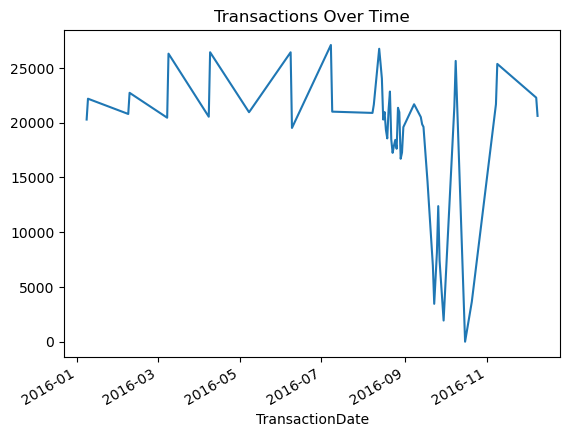

In [8]:
## Transcation trends analysis
df['TransactionDate'].value_counts().sort_index().plot()
plt.title('Transactions Over Time')
plt.show()

In [9]:
# filter dates where year is greater than 2025
# invalid_dates = df[df['CustomerDOB'].dt.year > 2025]
valid_dob = df[(df['CustomerDOB'].dt.year >= 1900) & (df['CustomerDOB'].dt.year <= 2025)]
invalid_dob = len(df) - len(valid_dob)
print(f"Number of valid rows: {len(valid_dob)}")
print(f"Number of invalid rows: {invalid_dob}")
#display the valid rows
valid_dob


Number of valid rows: 880533
Number of invalid rows: 161081


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,17:38:06,566.0
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,17:05:37,148.0
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0


In [10]:
# Print the maximum transaction amount in the valid_dob DataFrame
max_transaction_valid = valid_dob['TransactionAmount (INR)'].max()
print(f"Maximum Transaction Amount in valid DOB: {max_transaction_valid}")

Maximum Transaction Amount in valid DOB: 1560034.99


In [11]:
# Filter and display invalid rows
invalid_rows = df[(df['CustomerDOB'].dt.year < 1900) | (df['CustomerDOB'].dt.year > 2025)]
invalid_rows

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.00
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.00
5,T6,C1536588,2072-08-10,F,ITANAGAR,53609.20,2016-02-08,17:39:40,676.00
15,T16,C8334633,2068-10-07,F,NEW DELHI,1283.12,2016-01-08,12:57:25,250.00
16,T17,C1376215,1800-01-01,M,MUMBAI,77495.15,2016-01-08,12:47:27,1423.11
...,...,...,...,...,...,...,...,...,...
1041580,T1048534,C7431884,1800-01-01,M,MANDIR DHANBAD,53771.64,2016-09-18,18:40:49,520.00
1041583,T1048537,C2939947,2033-05-10,M,NEW DELHI,92173.35,2016-09-18,18:45:56,1319.04
1041587,T1048541,C1528025,1800-01-01,M,MUMBAI,230894.59,2016-09-18,18:23:31,290.00
1041591,T1048545,C3712582,2071-05-10,M,MUMBAI,25414.52,2016-09-18,18:20:15,400.00


In [12]:
max_transaction_invalid = invalid_rows['TransactionAmount (INR)'].max()
print(f"Maximum Transaction Amount in invalid DOB: {max_transaction_invalid}")

Maximum Transaction Amount in invalid DOB: 724122.0


In [13]:
#comparing the mean and median of the CustomerDOB column to check for outliers
mean = df['CustomerDOB'].mean()
median = df['CustomerDOB'].median()
skewness = df['CustomerDOB'].dt.year.skew()
print(f"Mean: {mean}, Median: {median}, Skewness: {skewness}")


Mean: 1985-07-03 08:17:32.308436800, Median: 1988-12-13 00:00:00, Skewness: -2.2573728265111783


Yes there are outliers, the column is negatively skewed because the mean is less than the meidan

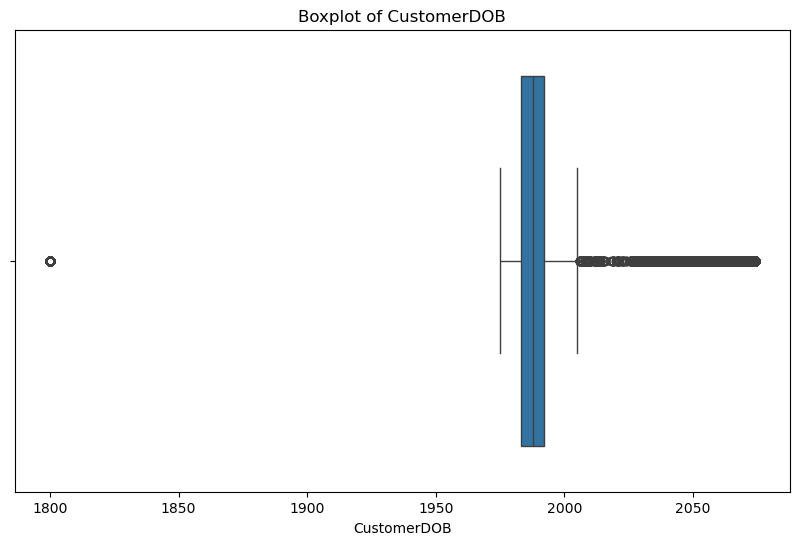

In [34]:
# checking for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x = df['CustomerDOB'].dt.year)
plt.title('Boxplot of CustomerDOB')
plt.show()

In [15]:
## Removal of outliers
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = df['CustomerDOB'].dt.year.quantile(0.25)
q3 = df['CustomerDOB'].dt.year.quantile(0.75)

# Calculate the IQR
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

#Remove rows where CustomerDOB falls outside the bounds
df_cleaned = df[(df['CustomerDOB'].dt.year >= lower_bound) & (df['CustomerDOB'].dt.year <= upper_bound)].copy()
# Display the cleaned DataFrame
print(f"Number of rows after removing outliers: {len(df_cleaned)}")
# Display the cleaned DataFrame
df_cleaned

Lower Bound: 1969.5, Upper Bound: 2005.5
Number of rows after removing outliers: 880280


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,17:38:06,566.0
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,17:05:37,148.0
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0


In [16]:
# Viewing the cleaned data
df_cleaned

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,17:38:06,566.0
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,17:05:37,148.0
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0


In [17]:
df_cleaned['CustomerDOB'].dt.year.describe()

count    880280.000000
mean       1987.285484
std           5.155820
min        1975.000000
25%        1984.000000
50%        1988.000000
75%        1991.000000
max        2005.000000
Name: CustomerDOB, dtype: float64

In [18]:
# Recalculating the mean and median of the CustomerDOB column after removing outliers
mean = df_cleaned['CustomerDOB'].dt.year.mean()
median = df_cleaned['CustomerDOB'].dt.year.median()
skewness = df_cleaned['CustomerDOB'].dt.year.skew()

print(f"Mean: {mean}, Median: {median}, Skewness: {skewness}")

Mean: 1987.2854841641297, Median: 1988.0, Skewness: -0.44671151007706317


Removing outliers was the best for this dataset, as it reduced the skewness and brought the mean closer to the median, because the mean and median are now much closer, indicating a more symmetric distribution.
The skewness has reduced significantly (-0.44), which is closer to 0, suggesting the data is now only slightly negatively skewed.

Age
32     350000.00
35     946007.35
36    1150012.66
37     520009.87
39    1098416.62
40     400000.00
41    1523406.16
43     525003.83
44     455122.00
46    1758008.95
47     964320.00
48    2551167.21
Name: TransactionAmount (INR), dtype: float64


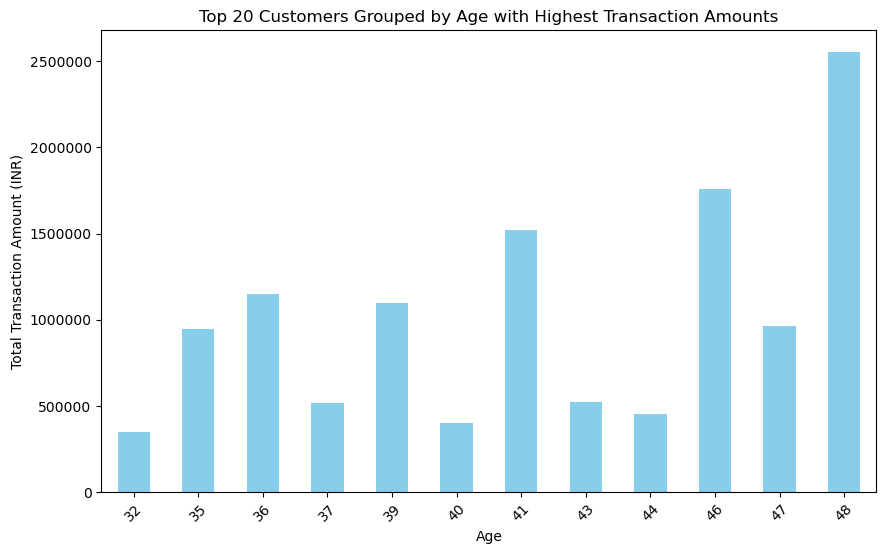

In [19]:
# Calculate the age of customers
df_cleaned['Age'] = (pd.to_datetime('today') - df_cleaned['CustomerDOB']).dt.days // 365

# Sort the DataFrame by transaction amount in descending order and select the top 20 customers
top_20_customers = df_cleaned.sort_values(by='TransactionAmount (INR)', ascending=False).head(20)

# Group the top 20 customers by age and sum their transaction amounts
grouped_by_age = top_20_customers.groupby('Age')['TransactionAmount (INR)'].sum()

# Display the grouped data
print(grouped_by_age)

# Plot the grouped data
plt.figure(figsize=(10, 6))
grouped_by_age.plot(kind='bar', color='skyblue')
plt.title('Top 20 Customers Grouped by Age with Highest Transaction Amounts')
plt.xlabel('Age')
plt.ylabel('Total Transaction Amount (INR)')

 #Remove scientific notation from the y-axis
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)

plt.xticks(rotation=45)
plt.show()

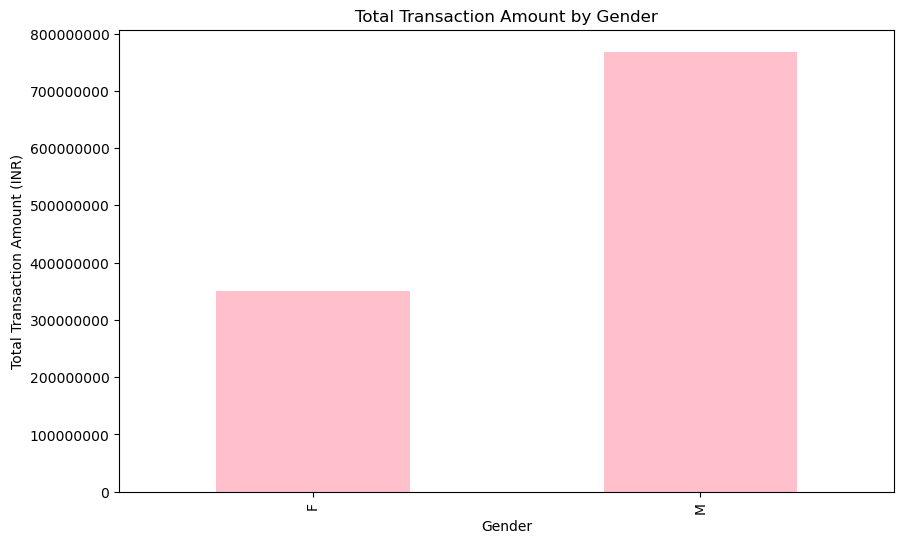

In [20]:
#Transcation amount based on gender
transaction_by_gender = df_cleaned.groupby('CustGender')['TransactionAmount (INR)'].sum()
transaction_by_gender.plot(kind='bar', color='pink', figsize=(10, 6))
plt.title('Total Transaction Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Transaction Amount (INR)')
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

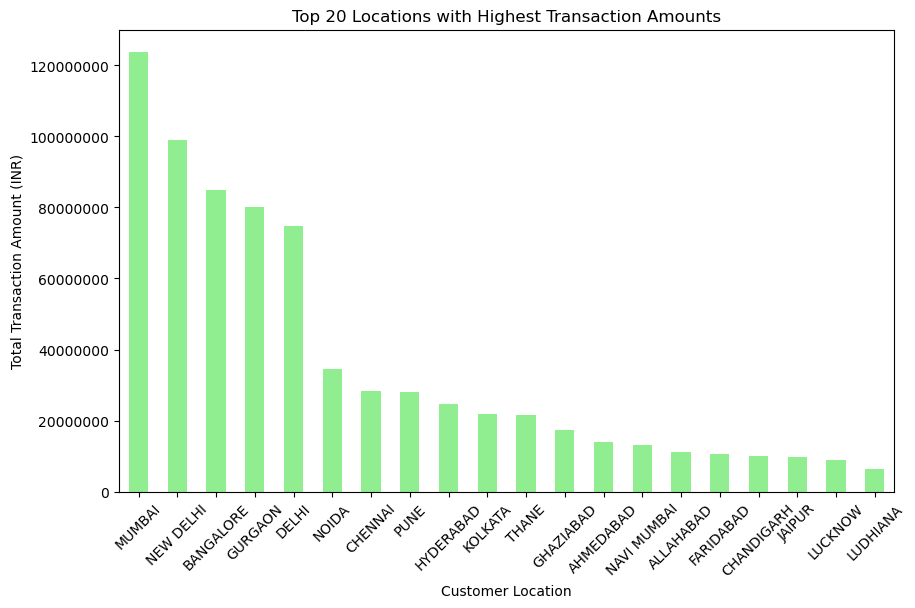

In [21]:
### Customers Location with highest transaction amount
# Group the DataFrame by 'CustomerLocation' and sum the transaction amounts
transaction_by_location = df_cleaned.groupby('CustLocation')['TransactionAmount (INR)'].sum()
# Sort the grouped data in descending order
transaction_by_location = transaction_by_location.sort_values(ascending=False)
# Display the top 10 locations with the highest transaction amounts
top_10_locations = transaction_by_location.head(20)
# Plot the top 10 locations with the highest transaction amounts
plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar', color='lightgreen')
plt.title('Top 20 Locations with Highest Transaction Amounts')
plt.xlabel('Customer Location')
plt.ylabel('Total Transaction Amount (INR)')
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.show()

In [22]:
# Summary statistics for transaction amounts
transaction_summary = df_cleaned['TransactionAmount (INR)'].describe()
print(transaction_summary)

# Total transaction amount
total_transaction_amount = df_cleaned['TransactionAmount (INR)'].sum()
print(f"Total Transaction Amount: {total_transaction_amount}")

# Average transaction amount
average_transaction_amount = df_cleaned['TransactionAmount (INR)'].mean()
print(f"Average Transaction Amount: {average_transaction_amount}")

count    8.802800e+05
mean     1.270660e+03
std      5.404594e+03
min      0.000000e+00
25%      1.460000e+02
50%      3.950000e+02
75%      1.000000e+03
max      1.560035e+06
Name: TransactionAmount (INR), dtype: float64
Total Transaction Amount: 1118536952.3000002
Average Transaction Amount: 1270.6604174808017


In [23]:
# Top 20 customers by total transaction amount
top_customers = df_cleaned.groupby('CustomerID')['TransactionAmount (INR)'].sum().sort_values(ascending=False).head(20)
print(top_customers)

CustomerID
C7319271    1560034.99
C6677159    1380002.88
C4141768     991132.22
C1830891     720001.16
C6549785     600008.32
C5036642     600003.45
C1425138     561001.00
C3528755     550972.34
C1115779     525003.83
C5938826     520009.87
C8755262     514320.00
C7730454     510005.16
C7367184     455122.00
C7525532     453000.00
C6836340     452400.00
C5133852     400000.00
C5727148     378615.46
C6741078     378205.07
C4881650     350000.00
C6514935     346003.90
Name: TransactionAmount (INR), dtype: float64


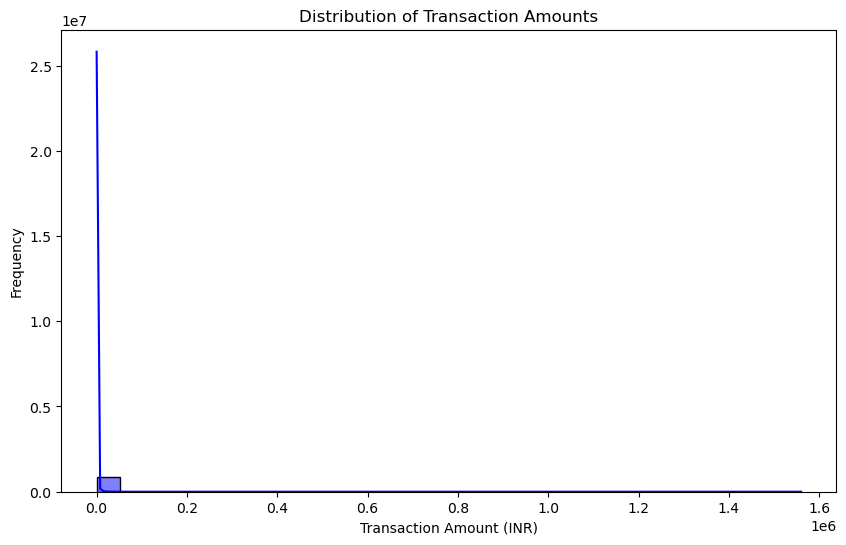

In [24]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['TransactionAmount (INR)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Frequency')
plt.show()

### Calculating RFM Analysis

Recency: How recently a customer made a transaction.

Frequency: How often a customer makes transactions.

Monetary: The total monetary value of a customer's transactions.

In [25]:
# Step 1: Find most recent transaction date
reference_date = df_cleaned['TransactionDate'].max()
print(f"Reference Date: {reference_date}")

# Step 2: Calculate Recency (days since the last transaction)
df_cleaned['Recency'] = (reference_date - df_cleaned['TransactionDate']).dt.days

# Step 3: Calculate Frequency (number of transactions per customer)
frequency = df_cleaned.groupby('CustomerID').size()

# Step 4: Calculate Monetary (total transaction amount per customer)
monetary = df_cleaned.groupby('CustomerID')['TransactionAmount (INR)'].sum()

# Step 5: Combine RFM metrics into a single DataFrame
rfm = pd.DataFrame({
    'Recency': df_cleaned.groupby('CustomerID')['Recency'].min(),
    'Frequency': frequency,
    'Monetary': monetary
}).reset_index()

# Display the RFM DataFrame
rfm

Reference Date: 2016-12-09 00:00:00


,CustomerID,Recency,Frequency,Monetary
0,C1010011,74,2,5106.0
1,C1010012,117,1,1499.0
2,C1010014,154,2,1455.0
3,C1010018,85,1,30.0
4,C1010028,102,1,557.0
...,...,...,...,...
761775,C9099836,154,1,691.0
761776,C9099877,85,1,222.0
761777,C9099919,113,1,126.0
761778,C9099941,103,1,50.0


In [26]:
print(f"Unique Recency values: {rfm['Recency'].nunique()}")
print(f"Unique Frequency values: {rfm['Frequency'].nunique()}")
print(f"Unique Monetary values: {rfm['Monetary'].nunique()}")

Unique Recency values: 55
Unique Frequency values: 6
Unique Monetary values: 83339


In [27]:
# Calculate RFM scores
# Assign scores for Recency, Frequency, and Monetary
rfm['R_Score'] = pd.cut(rfm['Recency'], bins=4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=4, labels=[1, 2, 3, 4])
# Combine scores into RFM Segment
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Calculate total RFM Score
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# Display the RFM DataFrame
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,C1010011,74,2,5106.0,4,1,1,411,6
1,C1010012,117,1,1499.0,3,1,1,311,5
2,C1010014,154,2,1455.0,3,1,1,311,5
3,C1010018,85,1,30.0,3,1,1,311,5
4,C1010028,102,1,557.0,3,1,1,311,5
...,...,...,...,...,...,...,...,...,...
761775,C9099836,154,1,691.0,3,1,1,311,5
761776,C9099877,85,1,222.0,3,1,1,311,5
761777,C9099919,113,1,126.0,3,1,1,311,5
761778,C9099941,103,1,50.0,3,1,1,311,5


CustomerID: Unique identifier for each customer.

Recency: Number of days since the customer's last transaction (lower is better).

Frequency: Number of transactions made by the customer (higher is better).

Monetary: Total monetary value of the customer's transactions (higher is better).

R_Score: Recency score (4 = most recent, 1 = least recent).

F_Score: Frequency score (4 = most frequent, 1 = least frequent)

In [28]:
# Find the maximum RFM_Score
max_rfm_score = rfm['RFM_Score'].max()
print(f"Maximum RFM Score: {max_rfm_score}")

# Filter customers with the highest RFM_Score
highest_rfm_customers = rfm[rfm['RFM_Score'] == max_rfm_score]
print(f"number of customers with the highest RFM_Score: {len(highest_rfm_customers)}")
# Display the customers with the highest RFM_Score
highest_rfm_customers

Maximum RFM Score: 9
number of customers with the highest RFM_Score: 44


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
39376,C1417851,1,5,4111.00,4,4,1,441,9
45222,C1442336,1,5,2304.00,4,4,1,441,9
58990,C1621560,31,5,1351.18,4,4,1,441,9
85072,C1912318,1,5,5294.00,4,4,1,441,9
99617,C2034340,78,5,2722.00,4,4,1,441,9
114517,C2217749,30,5,2760.00,4,4,1,441,9
152159,C2618678,78,5,27519.60,4,4,1,441,9
171439,C2820957,74,5,11612.75,4,4,1,441,9
174483,C2833541,75,5,16750.00,4,4,1,441,9
182592,C2927851,61,5,492.00,4,4,1,441,9


Customers with higher RFM_Score (e.g., 9 or 10) are the best customers.

Customers with lower RFM_Score (e.g., 3 or 4) may need re-engagement or retention strategies.

In [29]:
# Define a function to map RFM_Score to segments
def map_segment_by_score(score):
    if score >= 9:
        return 'Best Customers'
    elif score >= 6:
        return 'Loyal Customers'
    elif score >= 4:
        return 'At-Risk Customers'
    else:
        return 'Lost Customers'

# Apply the function to create a new Segment column
rfm['Segment'] = rfm['RFM_Score'].apply(map_segment_by_score)

# Display the updated RFM DataFrame
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Segment
0,C1010011,74,2,5106.0,4,1,1,411,6,Loyal Customers
1,C1010012,117,1,1499.0,3,1,1,311,5,At-Risk Customers
2,C1010014,154,2,1455.0,3,1,1,311,5,At-Risk Customers
3,C1010018,85,1,30.0,3,1,1,311,5,At-Risk Customers
4,C1010028,102,1,557.0,3,1,1,311,5,At-Risk Customers
...,...,...,...,...,...,...,...,...,...,...
761775,C9099836,154,1,691.0,3,1,1,311,5,At-Risk Customers
761776,C9099877,85,1,222.0,3,1,1,311,5,At-Risk Customers
761777,C9099919,113,1,126.0,3,1,1,311,5,At-Risk Customers
761778,C9099941,103,1,50.0,3,1,1,311,5,At-Risk Customers


### K-Means Clustering using elbow Method

In [30]:
print(rfm[['Recency', 'Frequency', 'Monetary']].dtypes)

rfm['Monetry'] = rfm['Recency'].astype(int)
print (rfm['Monetry'].dtypes)


Recency        int64
Frequency      int64
Monetary     float64
dtype: object
int64


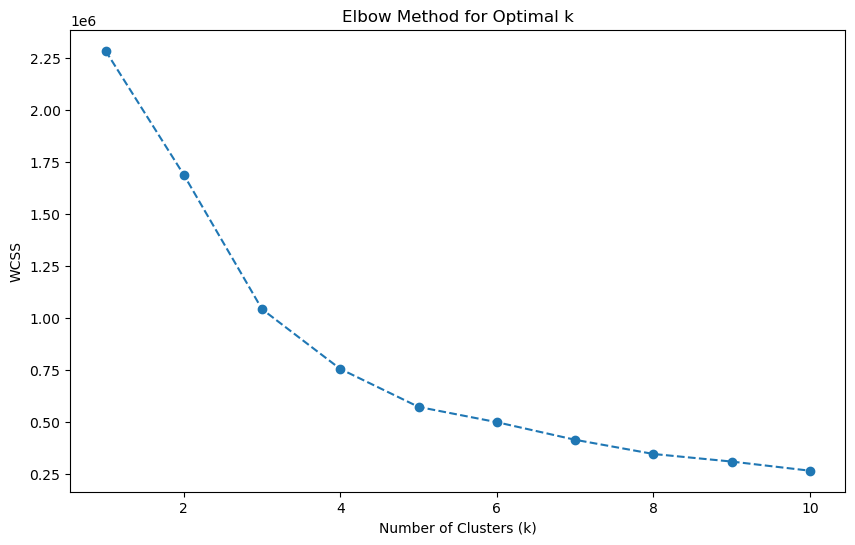

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize the RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Use the elbow method to find the optimal number of clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Analysis of clusters

# Apply K-Means with the optimal number of clusters
optimal_k = 4  # Replace with the value determined from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Select only numeric columns for analysis
numeric_columns = rfm.select_dtypes(include=['float64', 'int64'])  # Ensure only numeric columns are selected

# Add the 'Cluster' column back to the numeric DataFrame
numeric_columns['Cluster'] = rfm['Cluster']

# Group by 'Cluster' and calculate the mean
cluster_analysis = numeric_columns.groupby('Cluster').mean()

# Display the cluster analysis
cluster_analysis

,Recency,Frequency,Monetary,RFM_Score,Monetry
Cluster,,,,,
0,274.645054,1.004543,1148.015979,3.399949,274.645054
1,98.827398,1.000000,1074.606061,5.182580,98.827398
2,89.547300,2.120464,2306.569100,5.413381,89.547300
3,122.019662,1.300433,64302.797059,4.993708,122.019662


Cluster 0:

High Recency (274 days): Customers haven't transacted recently.
Low Frequency (1.00): Customers rarely transact.
Low Monetary (1148): Customers spend less.
Interpretation: Likely "Lost Customers" who need re-engagement.

Cluster 1:

Moderate Recency (98 days): Customers transacted somewhat recently.
Low Frequency (1.00): Customers rarely transact.
Low Monetary (1074): Customers spend less.
Interpretation: "At-Risk Customers" who may need retention strategies.

Cluster 2:

Low Recency (89 days): Customers transacted recently.
Moderate Frequency (2.12): Customers transact more frequently.
Moderate Monetary (2306): Customers spend moderately.
Interpretation: "Loyal Customers" who are engaged and valuable.

Cluster 3:

Moderate Recency (122 days): Customers transacted recently.
Low Frequency (1.30): Customers transact occasionally.
Very High Monetary (64302): Customers spend significantly more.
Interpretation: "High-Value Customers" who are infrequent but high spenders.

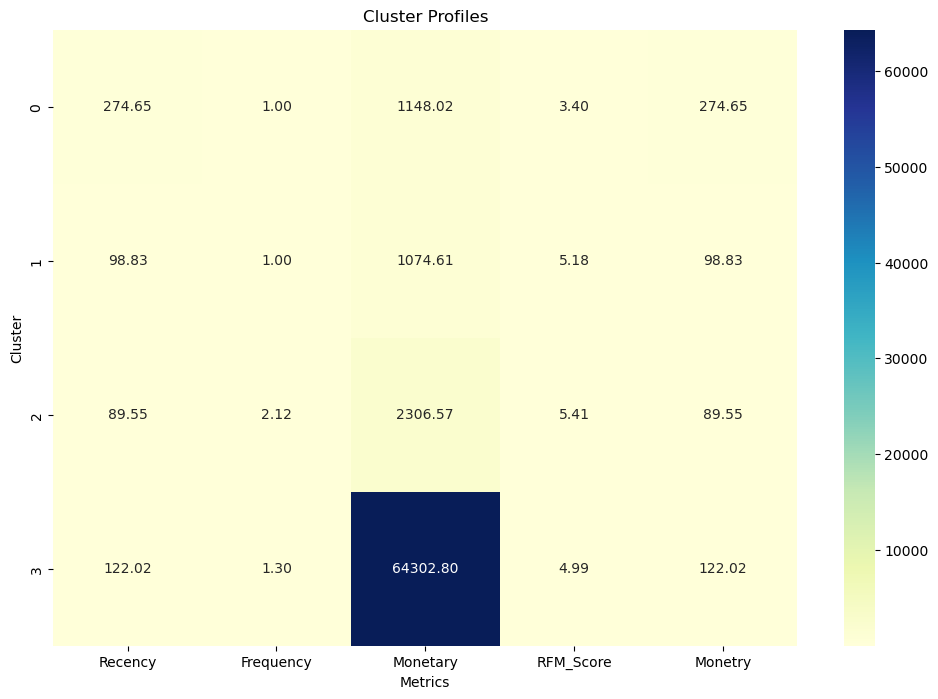

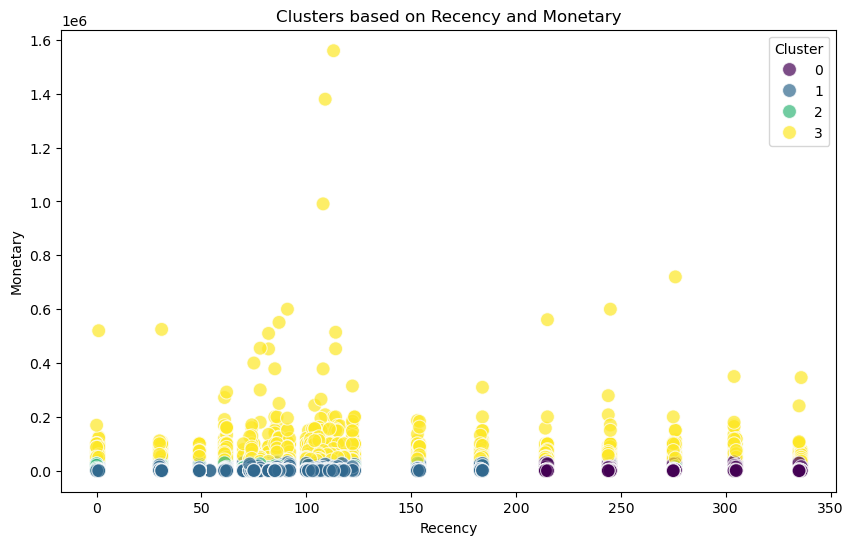

In [45]:

# Calculate the mean for each cluster
cluster_profile = numeric_columns.groupby('Cluster').mean()

# Visualize the cluster profiles
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_profile, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Cluster Profiles")
plt.xlabel("Metrics")
plt.ylabel("Cluster")
plt.show()

# Scatter plot for visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=rfm['Recency'], 
    y=rfm['Monetary'], 
    hue=rfm['Cluster'], 
    palette='viridis', 
    s=100, 
    alpha=0.7
)
plt.title("Clusters based on Recency and Monetary")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.legend(title="Cluster")
plt.show()

Cluster 0 (Purple):

High Recency: Customers haven't transacted recently.
Low Monetary: Customers spend very little.
Interpretation: These are likely "Lost Customers" who need re-engagement.

Cluster 1 (Blue):

Moderate Recency: Customers transacted somewhat recently.
Low Monetary: Customers spend very little.
Interpretation: These are "At-Risk Customers" who may need retention strategies.

Cluster 2 (Green):

Low Recency: Customers transacted recently.
Moderate Monetary: Customers spend moderately.
Interpretation: These are "Loyal Customers" who are engaged and valuable.

Cluster 3 (Yellow):

Moderate Recency: Customers transacted recently.
Very High Monetary: Customers spend significantly more.
Interpretation: These are "High-Value Customers" who are infrequent but high spenders.

Focus on Cluster 3 with personalized offers to retain high-value customers.

Re-engage Cluster 0 with campaigns to bring back lost customers.

Retain Cluster 1 with loyalty programs or discounts.

Reward Cluster 2 to maintain their loyalty

In [52]:
# Merge the cluster and segment information back to the original cleaned dataset
df_cleaned['Cluster'] = rfm['Cluster']
df_cleaned['Segment'] = rfm['Segment']

# Select relevant columns: CustomerID, Cluster, Segment, CustLocation (Country), and CustGender (Gender)
# Replace 'CustLocation' and 'CustGender' with the actual column names in your dataset
clustered_customers = df_cleaned[['CustomerID', 'Cluster', 'Segment', 'CustLocation', 'CustGender']]

# Display the customers grouped by clusters
for cluster in clustered_customers['Cluster'].unique():
    print(f"Cluster {cluster}:")
    print(clustered_customers[clustered_customers['Cluster'] == cluster])
    print("\n")

Cluster 2.0:
       CustomerID  Cluster            Segment CustLocation CustGender
0        C5841053      2.0    Loyal Customers   JAMSHEDPUR          F
2        C4417068      2.0  At-Risk Customers       MUMBAI          F
6        C7126560      2.0  At-Risk Customers       MUMBAI          F
11       C6939838      2.0    Loyal Customers       GUNTUR          M
25       C5521085      2.0    Loyal Customers      GURGAON          M
...           ...      ...                ...          ...        ...
761497   C8617927      2.0  At-Risk Customers       JAIPUR          M
761571   C5542164      2.0    Loyal Customers    BANGALORE          M
761603   C8025477      2.0  At-Risk Customers      RAICHUR          M
761648   C9029152      2.0  At-Risk Customers    NEW DELHI          M
761658   C6428765      2.0    Loyal Customers       RAMPUR          M

[88161 rows x 5 columns]


Cluster 1.0:
       CustomerID  Cluster            Segment CustLocation CustGender
4        C9031234      1.0  At-Risk 

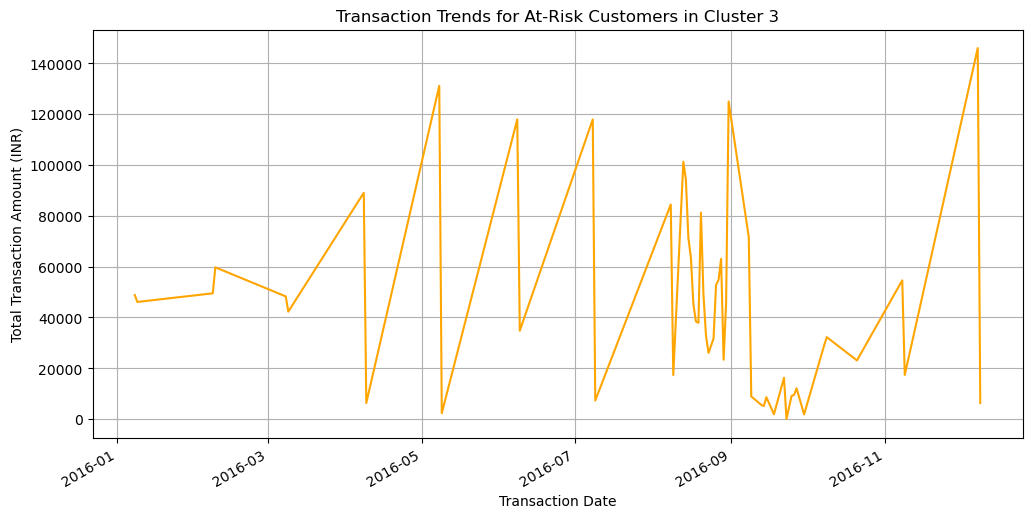

In [53]:
# Filter customers in Cluster 3 with "At-Risk Customers" segment
at_risk_customers = clustered_customers[
    (clustered_customers['Cluster'] == 3) & (clustered_customers['Segment'] == 'At-Risk Customers')
]

# Merge with the original dataset to get transaction history
at_risk_transactions = df_cleaned[df_cleaned['CustomerID'].isin(at_risk_customers['CustomerID'])]

# Analyze transaction trends over time
transaction_trends = at_risk_transactions.groupby('TransactionDate')['TransactionAmount (INR)'].sum()

# Plot transaction trends
plt.figure(figsize=(12, 6))
transaction_trends.plot(kind='line', color='orange')
plt.title('Transaction Trends for At-Risk Customers in Cluster 3')
plt.xlabel('Transaction Date')
plt.ylabel('Total Transaction Amount (INR)')
plt.grid()
plt.show()